## Running TEM

In [1]:
import matplotlib.pyplot as plt

from neuralplayground.agents import Whittington2020
from neuralplayground.arenas import BatchEnvironment
from neuralplayground.arenas import DiscreteObjectEnvironment
from neuralplayground.backend import tem_training_loop
from neuralplayground.backend import SingleSim

from neuralplayground.agents.whittington_2020_extras import whittington_2020_parameters as parameters
from neuralplayground.experiments import Sargolini2006Data

In [2]:
simulation_id = "TEM_custom_sim"
agent_class = Whittington2020
env_class = BatchEnvironment
training_loop = tem_training_loop

params = parameters.parameters()
full_agent_params = params.copy()

arena_x_limits = [[-5,5], [-4,4], [-5,5], [-6,6], [-4,4], [-5,5], [-6,6], [-5,5], [-4,4], [-5,5], [-6,6], [-5,5], [-4,4], [-5,5], [-6,6], [-5,5]]
arena_y_limits = [[-5,5], [-4,4], [-5,5], [-6,6], [-4,4], [-5,5], [-6,6], [-5,5], [-4,4], [-5,5], [-6,6], [-5,5], [-4,4], [-5,5], [-6,6], [-5,5]]
room_widths = [10, 8, 10, 12, 8, 10, 12, 10, 8, 10, 12, 10, 8, 10, 12, 10]
room_depths = [10, 8, 10, 12, 8, 10, 12, 10, 8, 10, 12, 10, 8, 10, 12, 10]

env_params = {"environment_name": "BatchEnvironment",
              "env_class": DiscreteObjectEnvironment,
              "batch_size": 16,
              "arena_x_limits": arena_x_limits,
              "arena_y_limits": arena_y_limits,
              "state_density": 1,
              "n_objects": params["n_x"],
              "agent_step_size": 1,
              "use_behavioural_data": False,
              "data_path": None,
              "experiment_class": Sargolini2006Data}
agent_params = {"model_name": "SimpleTEM",
                "params": full_agent_params,
                "batch_size": 16,
                "room_widths": room_widths,
                "room_depths": room_depths,
                "state_densities": [1]*16,
                "use_behavioural_data": False}

training_loop_params = {"n_episode": 10, "params": full_agent_params}

In [3]:
sim = SingleSim(simulation_id = simulation_id,
                agent_class = agent_class,
                agent_params = agent_params,
                env_class = env_class,
                env_params = env_params,
                training_loop = training_loop,
                training_loop_params = training_loop_params)

In [4]:
print(sim)

Simulation: TEM_custom_sim
Agent: <class 'neuralplayground.agents.whittington_2020.Whittington2020'>
Agent params: {'model_name': 'SimpleTEM', 'params': {'has_static_action': True, 'n_actions': 4, 'explore_bias': 2, 'shiny_rate': 0, 'shiny_gamma': 0.7, 'shiny_beta': 1.5, 'shiny_n': 2, 'shiny_returns': 15, 'shiny': {'gamma': 0.7, 'beta': 1.5, 'n': 2, 'returns': 15}, 'train_it': 20000, 'n_rollout': 20, 'save_interval': 1000, 'n_envs_save': 6, 'batch_size': 16, 'state_density': 1, 'walk_it_min': 25, 'walk_it_max': 300, 'walk_it_window': 55.0, 'loss_weights_x': 1, 'loss_weights_p': 1, 'loss_weights_g': 1, 'loss_weights_reg_g': 0.01, 'loss_weights_reg_p': 0.02, 'loss_weights': tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.0100, 0.0200]), 'loss_weights_p_g_it': 2000, 'loss_weights_reg_p_it': 4000, 'loss_weights_reg_g_it': 40000000, 'eta_it': 16000, 'lambda_it': 200, 'p2g_scale_offset': 0, 'p2g_sig_val': 10000, 'p2g_sig_half_it': 400, 'p2g_sig_scale_it': 200, 'lr_max': 0.00094, 'l

In [5]:
sim.run_sim()

In [6]:
trained_agent, env, training_hist = sim.load_results()

In [7]:
sim.show_logs()

<Axes: >

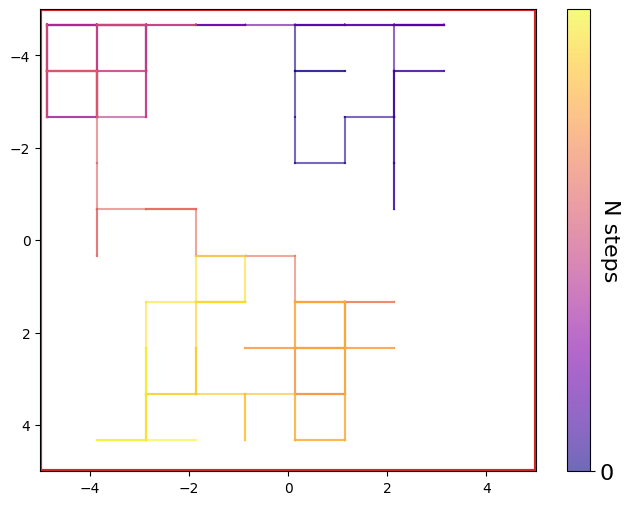

In [8]:
env.plot_trajectory()

## Plotting Results

In [9]:
import importlib
import os
import pickle
import pandas as pd
import torch

import neuralplayground.agents.whittington_2020_extras.whittington_2020_analyse as analyse
from neuralplayground.backend import PlotSim, tem_plotting_loop

In [10]:
simulation_id = "TEM_custom_plot_sim"
save_path = "results_sim/"
training_dict = pd.read_pickle(os.path.join(os.getcwd(), save_path, "params.dict"))
model_weights = pd.read_pickle(os.path.join(save_path, "agent"))
model_spec = importlib.util.spec_from_file_location("model", save_path + "whittington_2020_model.py")
model = importlib.util.module_from_spec(model_spec)
model_spec.loader.exec_module(model)
params = pd.read_pickle(os.path.join(save_path, "agent_hyper"))
tem = model.Model(params)
tem.load_state_dict(model_weights)
tem.eval()

Model(
  (alpha): ParameterList(
      (0): Parameter containing: [torch.float32 of size ]
      (1): Parameter containing: [torch.float32 of size ]
      (2): Parameter containing: [torch.float32 of size ]
      (3): Parameter containing: [torch.float32 of size ]
      (4): Parameter containing: [torch.float32 of size ]
  )
  (w_p): ParameterList(
      (0): Parameter containing: [torch.float32 of size ]
      (1): Parameter containing: [torch.float32 of size ]
      (2): Parameter containing: [torch.float32 of size ]
      (3): Parameter containing: [torch.float32 of size ]
      (4): Parameter containing: [torch.float32 of size ]
  )
  (g_init): ParameterList(
      (0): Parameter containing: [torch.float32 of size 30]
      (1): Parameter containing: [torch.float32 of size 30]
      (2): Parameter containing: [torch.float32 of size 24]
      (3): Parameter containing: [torch.float32 of size 18]
      (4): Parameter containing: [torch.float32 of size 18]
  )
  (logsig_g_init): Param

In [11]:
plotting_loop_params = {"n_episode": 50}
sim = PlotSim(
    simulation_id=simulation_id,
    agent_class=training_dict["agent_class"],
    agent_params=training_dict["agent_params"],
    env_class=training_dict["env_class"],
    env_params=training_dict["env_params"],
    plotting_loop=tem_plotting_loop,
    plotting_loop_params=plotting_loop_params,
)
print(sim)

---> Initializing models
---> Plotting loop
0
0
0
0
0
0
---> Finished


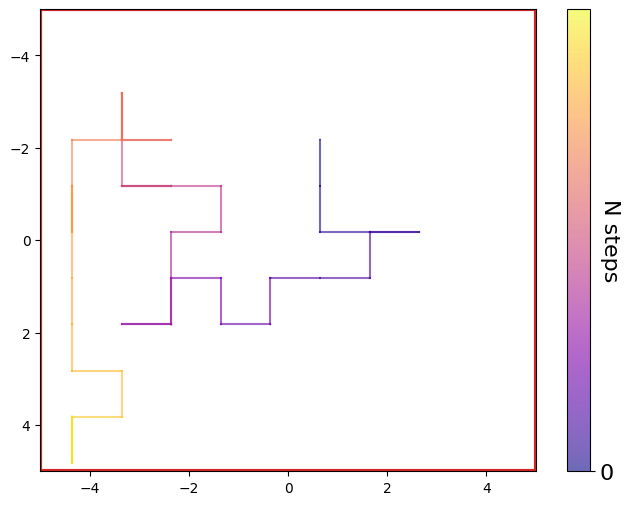

In [12]:
trained_agent, trained_env = sim.plot_sim(save_path)
trained_env.plot_trajectory()
# Load environments and model_input using pickle
with open(os.path.join(save_path, "NPG_environments.pkl"), "rb") as f:
    environments = pickle.load(f)
with open(os.path.join(save_path, "NPG_model_input.pkl"), "rb") as f:
    model_input = pickle.load(f)

In [13]:
training_dict["params"] = training_dict["agent_params"]
del training_dict["agent_params"]
agent = training_dict["agent_class"](**training_dict["params"])

In [14]:
with torch.no_grad():
    forward = tem(model_input, prev_iter=None)

In [15]:
include_stay_still = False
shiny_envs = [False, False, False, False]
env_to_plot = 0
envs_to_avg = shiny_envs if shiny_envs[env_to_plot] else [not shiny_env
                                                           for shiny_env in shiny_envs]

In [16]:
correct_model, correct_node, correct_edge = analyse.compare_to_agents(
    forward, tem, environments, include_stay_still=include_stay_still)
zero_shot = analyse.zero_shot(forward, tem, environments, 
                              include_stay_still=include_stay_still)
occupation = analyse.location_occupation(forward, tem, environments)
g, p = analyse.rate_map(forward, tem, environments)
from_acc, to_acc = analyse.location_accuracy(forward, tem, environments)

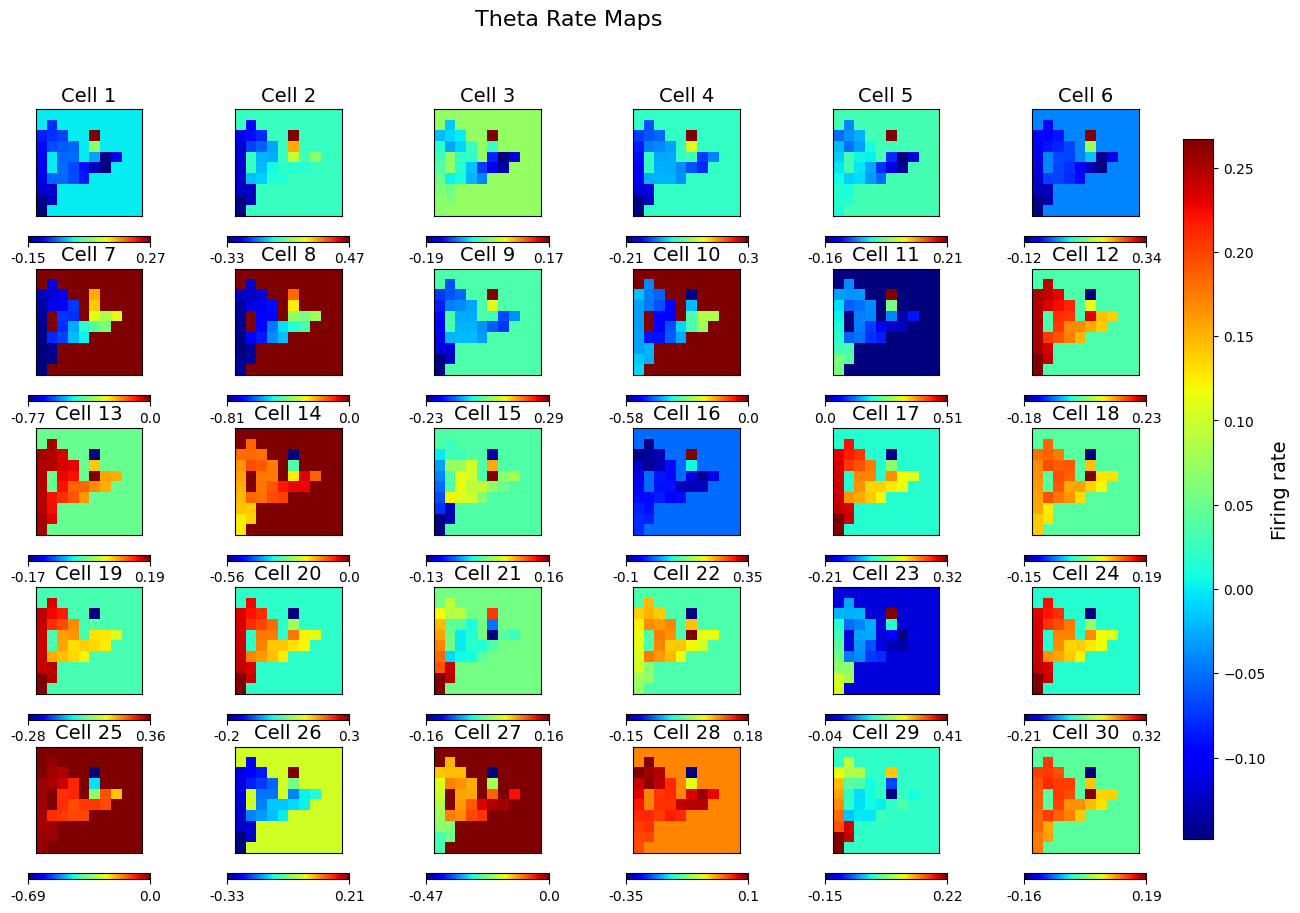

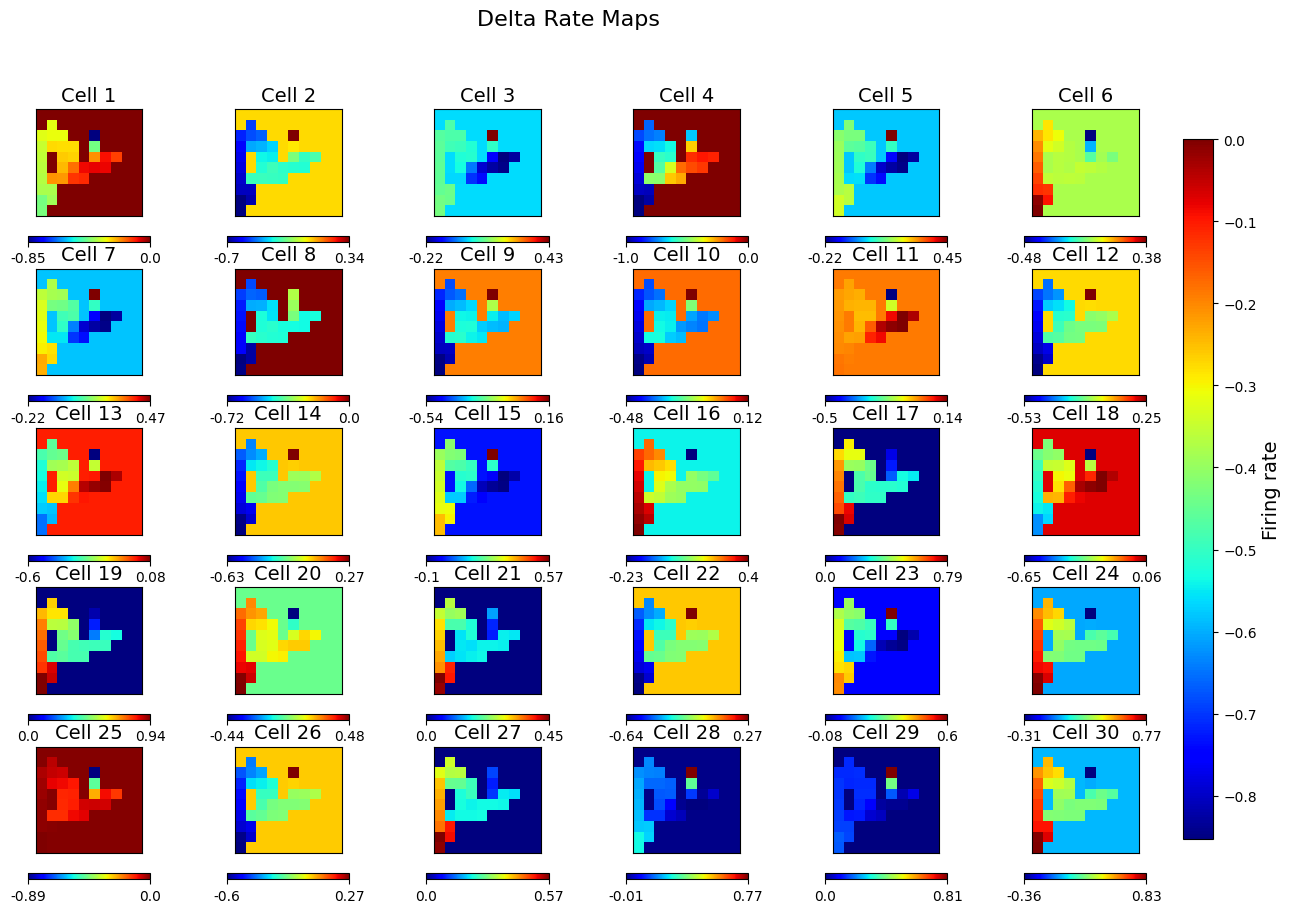

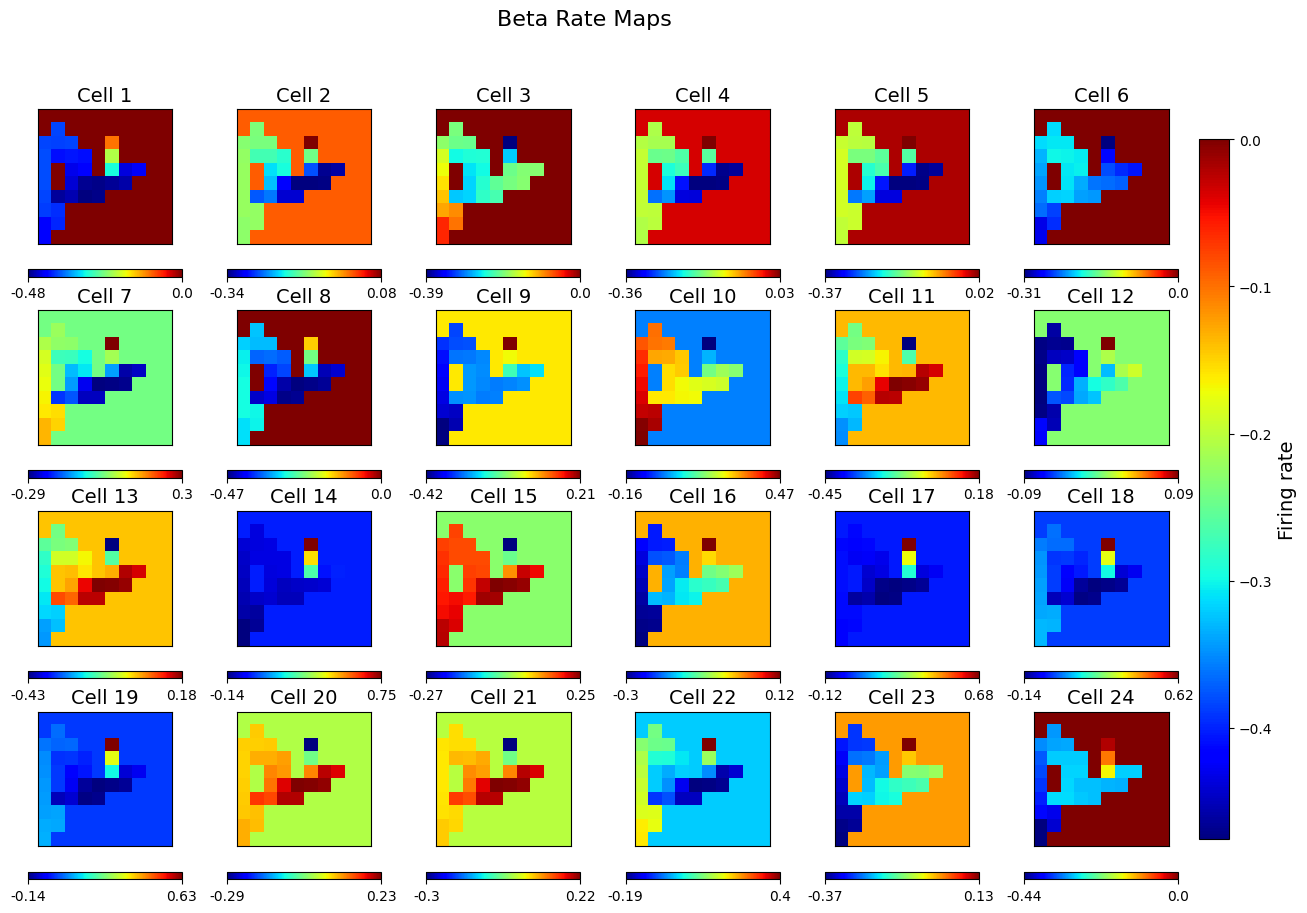

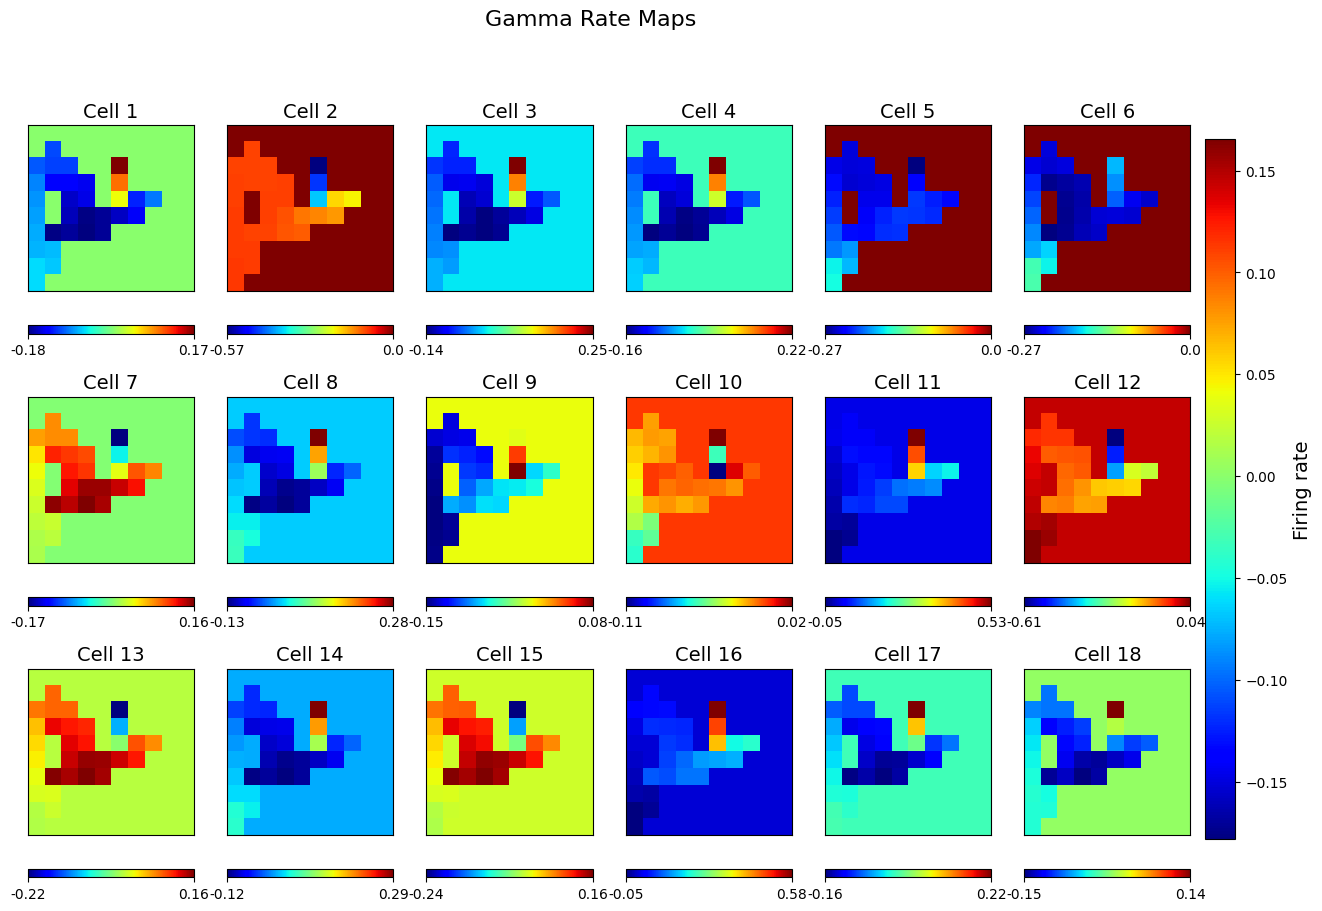

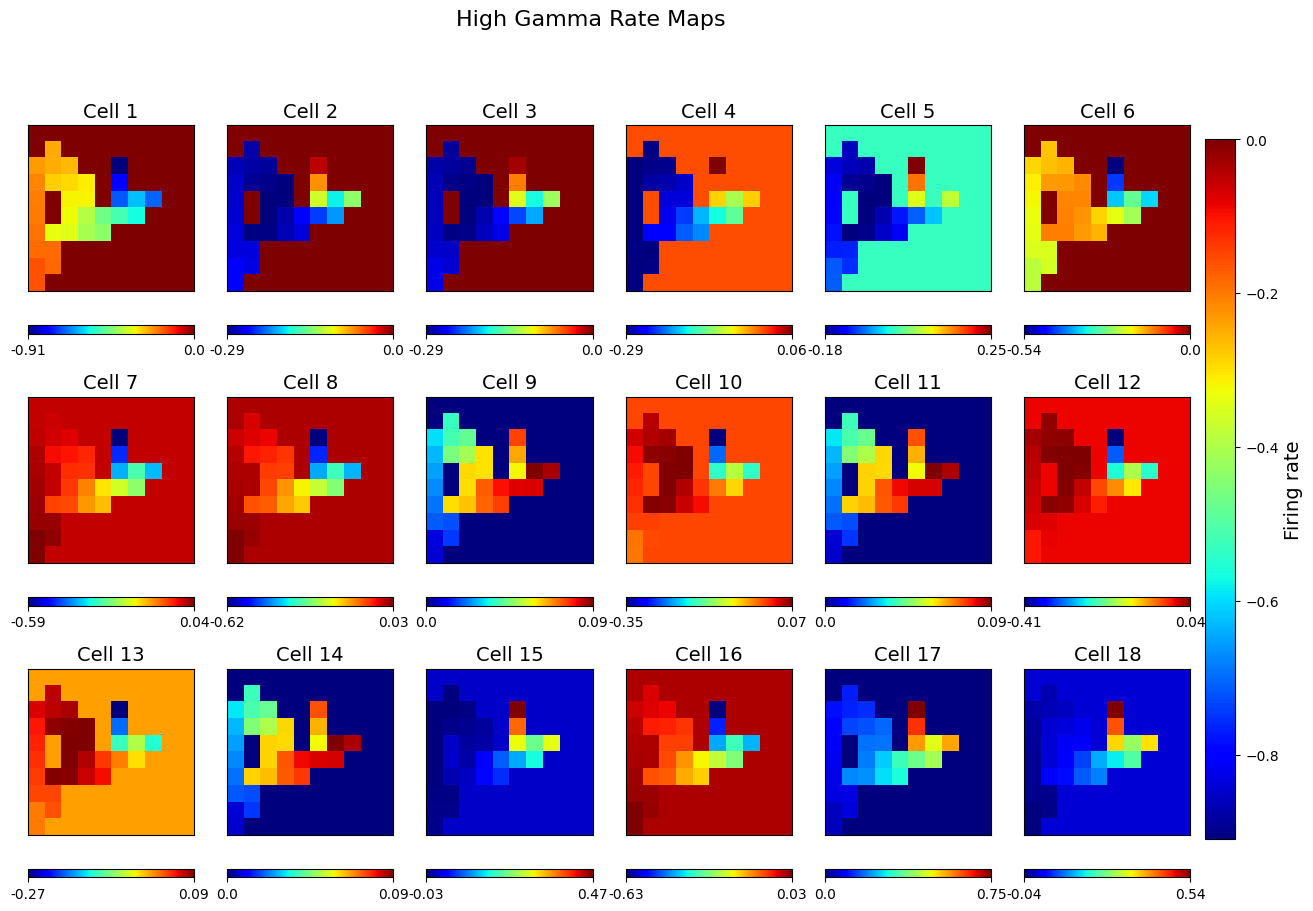

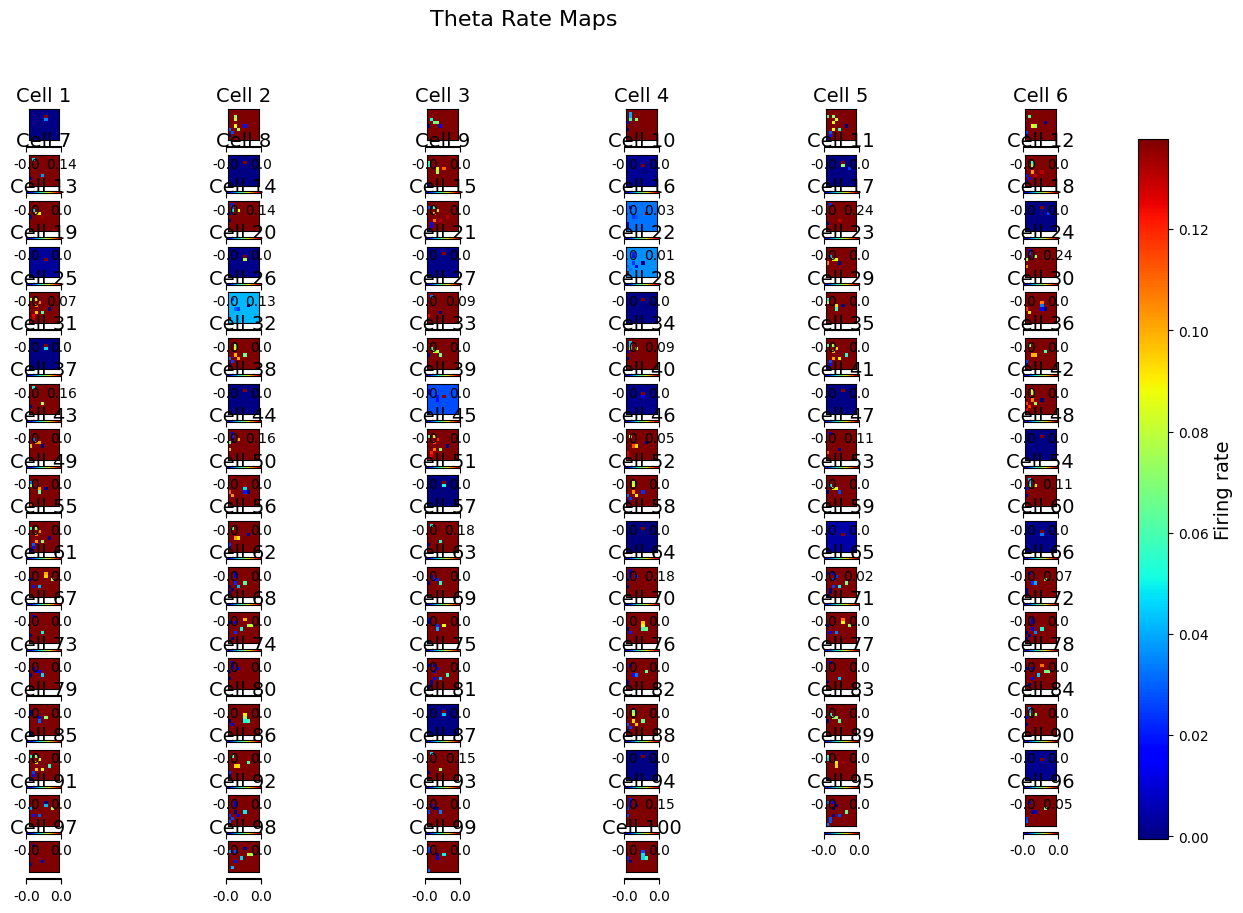

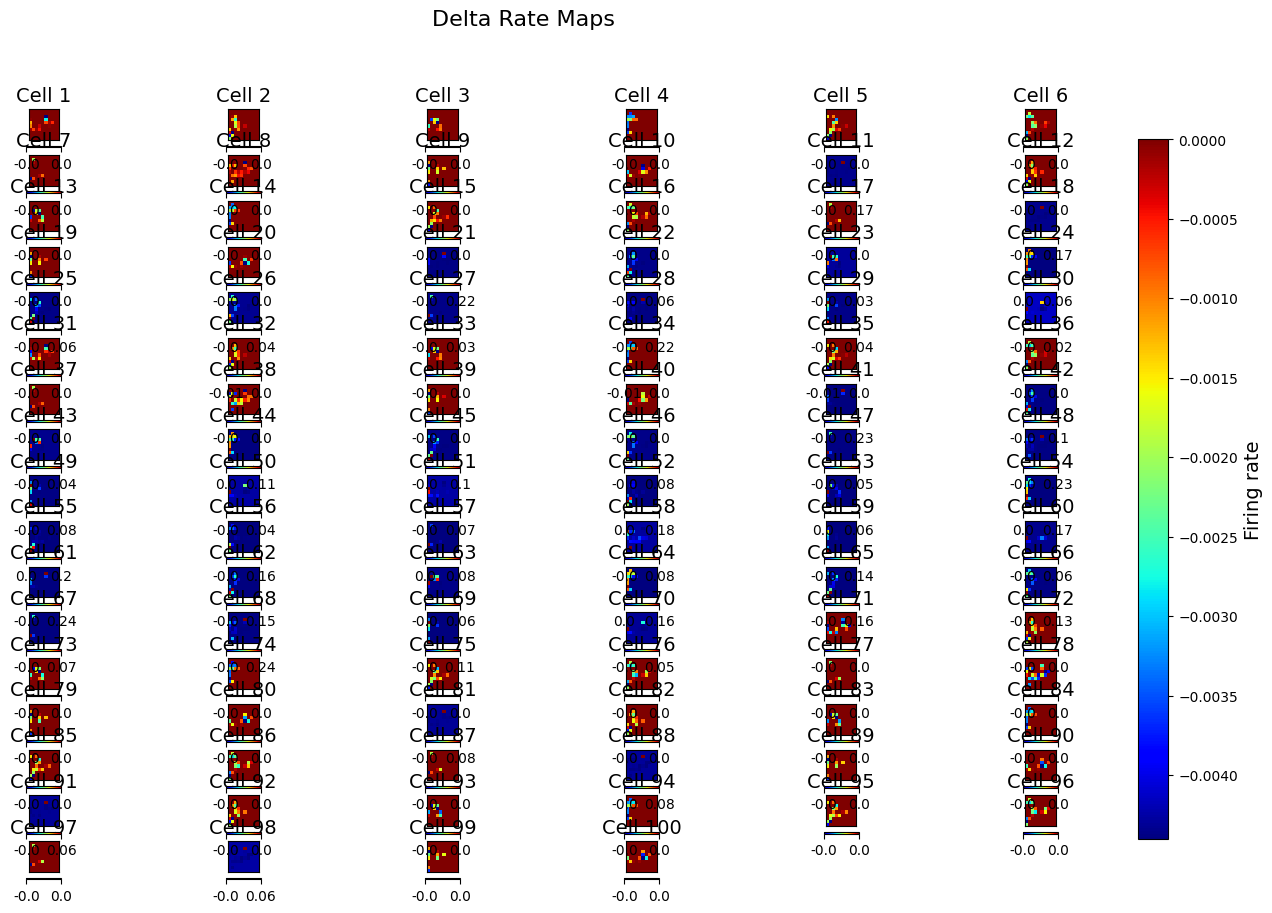

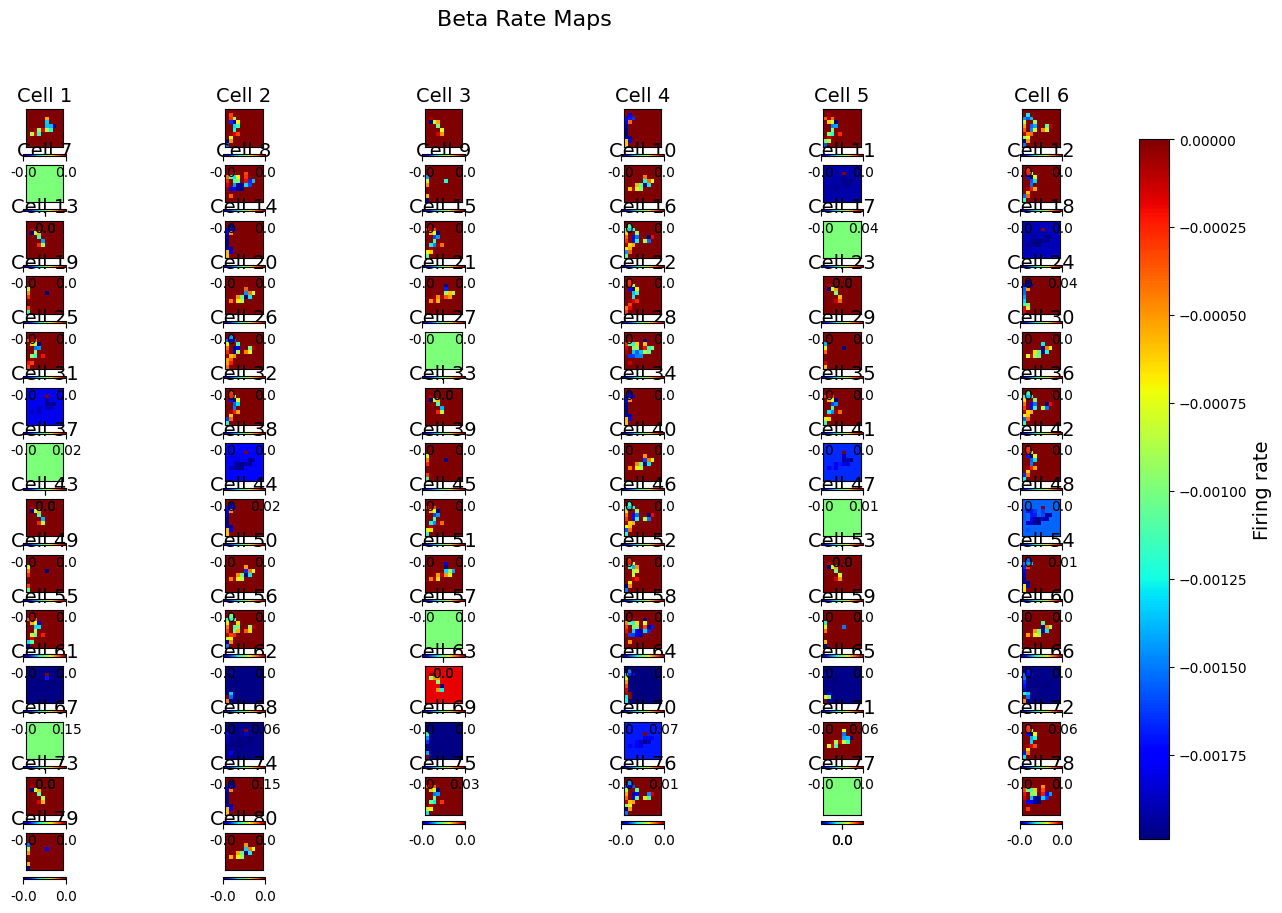

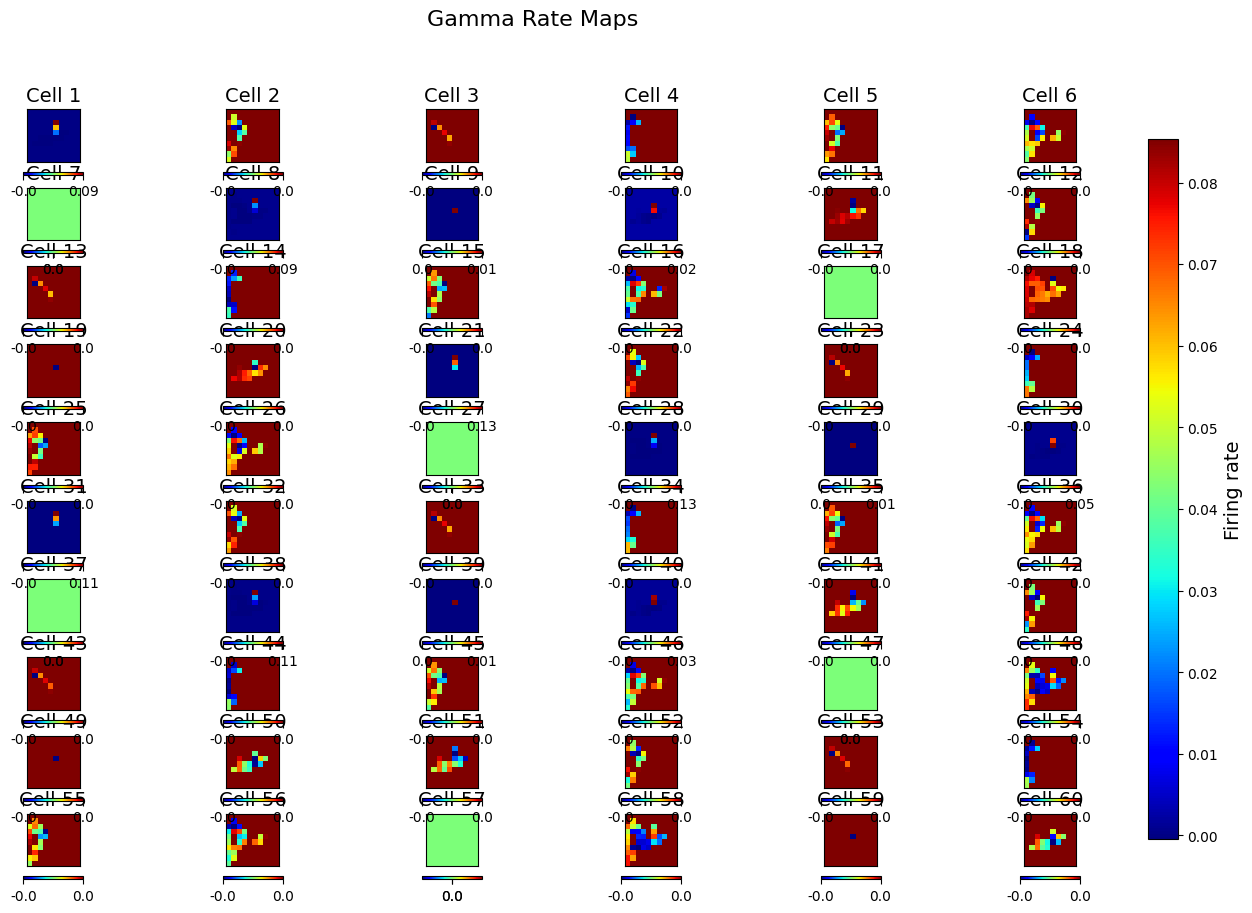

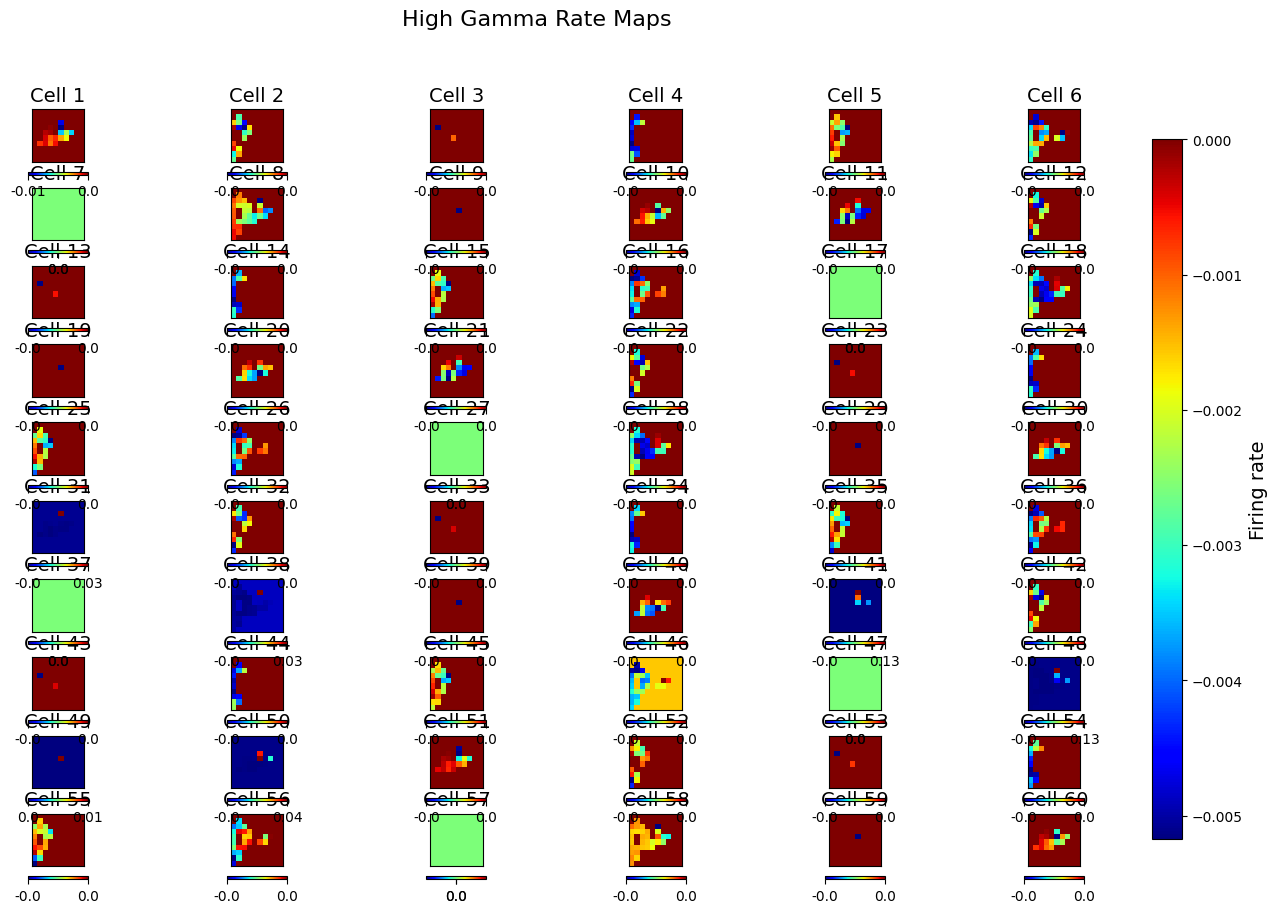

In [17]:
# Plot rate maps for grid and place cells
agent.plot_rate_map(g)
agent.plot_rate_map(p)
plt.show()